<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1">Dependencies</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2">Functions</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-3">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-4">Main</a></span></li><li><span><a href="#TMB-violin-plots" data-toc-modified-id="TMB-violin-plots-5">TMB violin plots</a></span><ul class="toc-item"><li><span><a href="#AOV-stats" data-toc-modified-id="AOV-stats-5.1">AOV stats</a></span></li><li><span><a href="#Test-pedHGG" data-toc-modified-id="Test-pedHGG-5.2">Test pedHGG</a></span></li></ul></li></ul></div>

# Dependencies

In [1]:
options(scipen = 999)

In [2]:
library(dplyr)
library(rms)
library(ggbeeswarm)
library(ggsignif)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Hmisc

Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units


Loading required package: SparseM


Attaching package: ‘SparseM’


The following object is masked from ‘package:base’:

    backsolve


Warning message in .recacheSubclasses(def@className, def, env):
“undefined subclass "numericVector" of class "Mnumeric"; definition not updated”


# Functions


In [1]:
source("~/OneDrive - UHN/R_src/ggplot2_theme.R")
source("~/OneDrive - UHN/R_src/color_schemes.R")
source("~/OneDrive - UHN/R_src/Heatmap_functions.R")
source("~/OneDrive - UHN/R_src/Oncoprint_functions.R")

Loading required package: grid

ComplexHeatmap version 2.6.2
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


circlize version 0.4.12
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))




# Paths

In [2]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Plots/"

# Main

Load df with matched TMB and estimate

In [3]:
load(file = paste0(datapath,"snv/total_mut_manifest_estimate.RData"))

In [4]:
load(file = file.path(datapath,"TME_clusters/IPD_estimate_metadata_IC.RData"))

In [5]:
ped_tmb <- total_mut_manifest_estimate[ total_mut_manifest_estimate$group != "TCGA",]

Add a new variable percentage reads for total_mut_manifest_estimate_quanti

In [6]:
ped_tmb$percread <- 8.0947988*exp(ped_tmb$ImmuneScore*0.0006267)

In [7]:
table(ped_tmb$sample_type)


Initial CNS Tumor           Primary     Primary Tumor 
              470               196                98 

In [8]:
table(metadata_IC$immune_cluster)


Pediatric inflamed     Myeloid-driven     Pediatric cold    Immune excluded 
                90                279                393                163 

In [9]:
colnames(metadata_IC)

[1] "aliquot_id"       "StromalScore"     "ImmuneScore"      "ESTIMATEScore"   
 [5] "name"             "case_id"          "sample_id"        "gender"          
 [9] "ethnicity"        "race"             "age_at_diagnosis" "vital_status"    
[13] "days_to_death"    "days_to_progress" "recurrence"       "disease_type"    
[17] "primary_site"     "group"            "cohort"           "sample_type"     
[21] "age_class"        "tumour_subtype"   "CRI_cluster"      "immune_cluster"

In [10]:
ped_tmb_IC <- merge(ped_tmb, metadata_IC[,c("sample_id", "immune_cluster", "tumour_subtype")], by = "sample_id")

In [11]:
dim(ped_tmb)

[1] 764  33

In [12]:
table(ped_tmb$cohort)


  ATRT     CP    CPH    EPN   ETMR     MB    MNG    NBL    NFB pedHGG pedLGG 
    30     13     19     52      9    191     11    100      7     63    257 
  SCHW 
    12 

# TMB violin plots

In [14]:
summary(ped_tmb_IC$snvpermb)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
  0.0000   0.0666   0.1665   1.2379   0.3996 324.7593      195 

In [15]:
#recode for plotting
ped_tmb_IC$snvpermb[ ped_tmb_IC$snvpermb == 0] <- 0.001
ped_tmb_IC$mutpermb[ ped_tmb_IC$mutpermb == 0] <- 0.001
#ped_tmb_IC$indelpermb[ ped_tmb_IC$indelpermb == 0] <- 0.001

Warning message:
“Removed 195 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 195 rows containing non-finite values (stat_boxplot).”


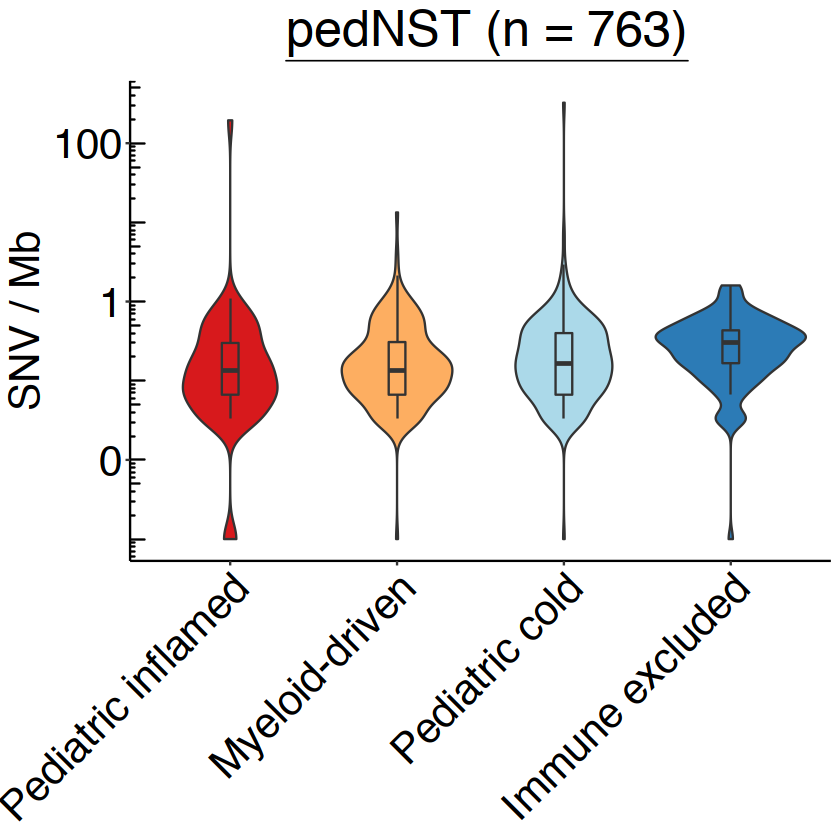

In [17]:
snvplot <- ggplot(data = ped_tmb_IC, aes(x = immune_cluster, y = snvpermb, fill = immune_cluster)) + 
geom_violin() + geom_boxplot(width = 0.1, outlier.colour = NA) + myaxis + myplot +
theme(legend.position = "none", 
      axis.text.x = element_text( angle = 45, hjust = 1),
     axis.title.x = element_blank(),
     plot.title = element_text(size = 30, hjust = 0.5)) +
scale_fill_manual(values = cluster_col) + 
scale_y_continuous(trans = "log10", labels = scales::label_number(accuracy = 1)) + annotation_logticks(sides = "l") +
labs(y = "SNV / Mb") +
ggtitle(expression(~underline("pedNST (n = 763)")))

snvplot 

In [18]:
pdf(file = paste0(plotpath,"immune_clusters_snvpermb.pdf"),
        width = 8, height = 8, useDingbats = FALSE)

snvplot

dev.off()

Warning message:
“Removed 195 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 195 rows containing non-finite values (stat_boxplot).”


pdf 
  2

In [19]:
dim(ped_tmb_IC)

[1] 763  35

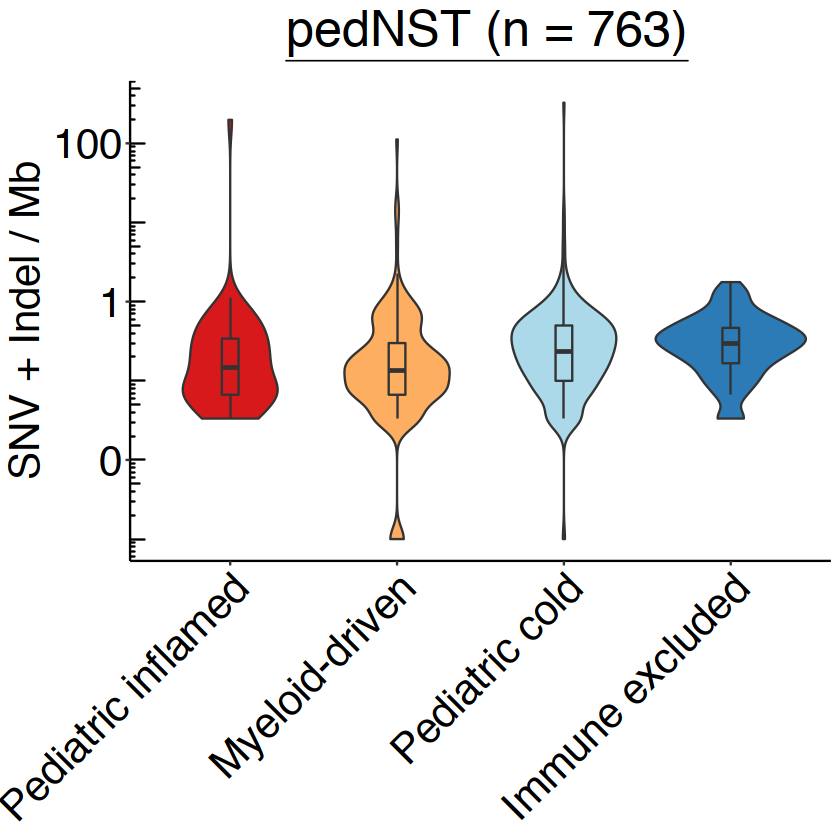

In [21]:
snvindelplot <- ggplot(data = ped_tmb_IC, aes(x = immune_cluster, y = mutpermb, fill = immune_cluster)) + 
geom_violin() + geom_boxplot(width = 0.1, outlier.colour = NA) + myaxis + myplot +
theme(legend.position = "none", 
      axis.text.x = element_text(angle = 45, hjust = 1),
      axis.title.x = element_blank(),
      plot.title = element_text(size = 30, hjust = 0.5)) +
scale_fill_manual(values = cluster_col) + 
scale_y_continuous(trans = "log10", labels = scales::label_number(accuracy = 1)) + 
annotation_logticks(sides = "l") +
labs(y = "SNV + Indel / Mb") + 
ggtitle(expression(~underline("pedNST (n = 763)")))

snvindelplot 

In [22]:
pdf(file = paste0(plotpath,"immune_clusters_mutpermb.pdf"),
        width = 8, height = 8, useDingbats = FALSE)
snvindelplot
    dev.off()

pdf 
  2

In [23]:
summary(ped_tmb_IC$indelpermb)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
0.00000 0.00000 0.00000 0.05054 0.03330 3.82971     195 

Warning message:
“Removed 195 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 195 rows containing non-finite values (stat_boxplot).”


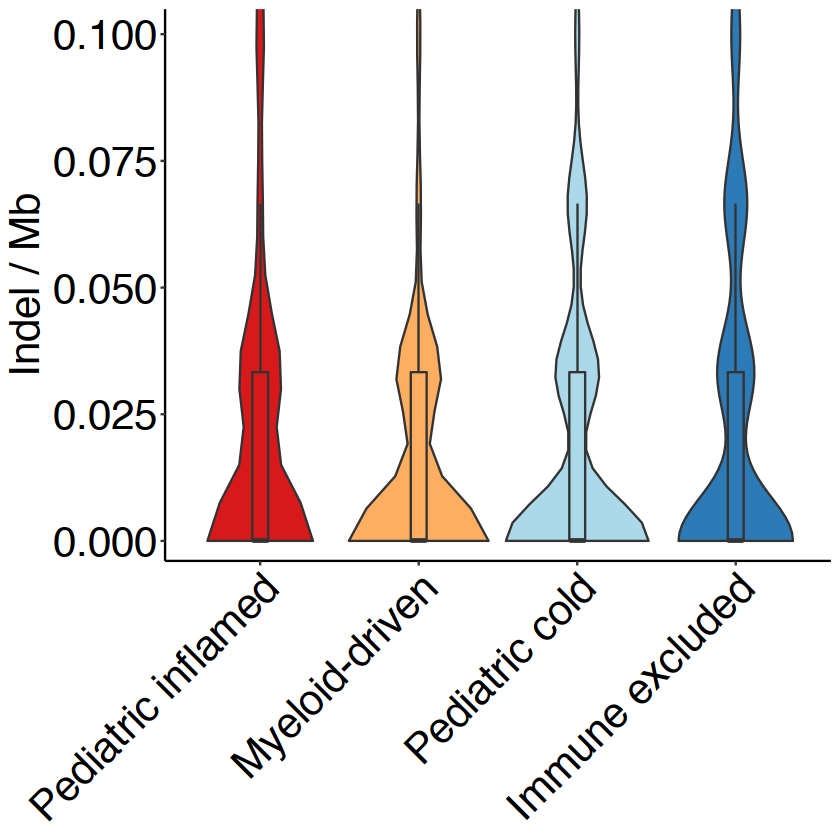

In [25]:
indelplot <- ggplot(data = ped_tmb_IC, aes(x = immune_cluster, y = indelpermb, fill = immune_cluster)) + 
geom_violin() + geom_boxplot(width = 0.1, outlier.colour = NA) + myaxis + myplot +
theme(legend.position = "none", 
      axis.text.x = element_text( angle = 45, hjust = 1),
     axis.title.x = element_blank()) +
scale_fill_manual(values = cluster_col) + 
#scale_y_continuous(trans = "log10") + annotation_logticks(sides = "l") +
labs(y = "Indel / Mb")

indelplot + coord_cartesian(ylim = c(0.001,0.1))

In [26]:
tapply(ped_tmb_IC$indelpermb, ped_tmb_IC$immune_cluster, summary)

$`Pediatric inflamed`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.0000  0.0000  0.0835  0.0333  3.8297       5 

$`Myeloid-driven`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.0000  0.0000  0.0492  0.0333  3.2636      57 

$`Pediatric cold`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.0000  0.0000  0.0443  0.0333  1.8316     123 

$`Immune excluded`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.0000  0.0000  0.0448  0.0333  0.7992      10 


## AOV stats

In [38]:
fit_tmb <- aov(snvpermb ~ immune_cluster + cohort, ped_tmb_IC)

summary.lm(fit_tmb)


Call:
aov(formula = snvpermb ~ immune_cluster + cohort, data = ped_tmb_IC)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.179  -0.403   0.134   0.537 310.864 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)   
(Intercept)                    2.84692    4.02688   0.707   0.4799   
immune_clusterMyeloid-driven  -3.04226    2.32827  -1.307   0.1919   
immune_clusterPediatric cold  -2.41691    2.39220  -1.010   0.3128   
immune_clusterImmune excluded -3.60437    2.66360  -1.353   0.1765   
cohortCP                       0.08143    5.58081   0.015   0.9884   
cohortCPH                     -0.94360    5.08809  -0.185   0.8529   
cohortEPN                     -0.19731    4.13764  -0.048   0.9620   
cohortETMR                     0.33023   11.61144   0.028   0.9773   
cohortMB                       0.60227    3.94861   0.153   0.8788   
cohortMNG                     -0.54825    5.92544  -0.093   0.9263   
cohortNBL                      0.26110    3.8

In [39]:
fit_tmb <- aov(mutpermb ~ immune_cluster + cohort, ped_tmb_IC)

summary.lm(fit_tmb)


Call:
aov(formula = mutpermb ~ immune_cluster + cohort, data = ped_tmb_IC)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.006  -0.282   0.036   0.356 314.909 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    2.531586   3.045493   0.831 0.406094    
immune_clusterMyeloid-driven  -2.422195   2.008310  -1.206 0.228166    
immune_clusterPediatric cold  -2.756848   2.053142  -1.343 0.179761    
immune_clusterImmune excluded -3.274918   2.282120  -1.435 0.151696    
cohortCP                       0.427549   4.748635   0.090 0.928283    
cohortCPH                     -0.857797   4.225119  -0.203 0.839172    
cohortEPN                      0.270433   3.308335   0.082 0.934873    
cohortETMR                     0.771491   5.428540   0.142 0.887025    
cohortMB                       0.774162   2.865959   0.270 0.787140    
cohortMNG                     -0.488140   5.049622  -0.097 0.923015    
cohortNBL              

In [40]:
fit_tmb <- aov(indelpermb ~ immune_cluster + cohort, ped_tmb_IC)

summary.lm(fit_tmb)


Call:
aov(formula = indelpermb ~ immune_cluster + cohort, data = ped_tmb_IC)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.3416 -0.0432 -0.0143  0.0142  3.4548 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    0.113605   0.063306   1.795 0.073275 .  
immune_clusterMyeloid-driven  -0.034759   0.036603  -0.950 0.342717    
immune_clusterPediatric cold  -0.067721   0.037608  -1.801 0.072289 .  
immune_clusterImmune excluded -0.078263   0.041874  -1.869 0.062152 .  
cohortCP                      -0.036499   0.087736  -0.416 0.677566    
cohortCPH                     -0.075931   0.079990  -0.949 0.342902    
cohortEPN                     -0.040609   0.065048  -0.624 0.532693    
cohortETMR                    -0.023962   0.182543  -0.131 0.895610    
cohortMB                       0.012236   0.062076   0.197 0.843817    
cohortMNG                     -0.061141   0.093154  -0.656 0.511876    
cohortNBL            

## Test pedHGG

In [41]:
hgg <- ped_tmb_IC[ ped_tmb_IC$cohort == "pedHGG",]

pairwise.wilcox.test(hgg$mutpermb, hgg$immune_cluster, p.adjust.method = "none")

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”



	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  hgg$mutpermb and hgg$immune_cluster 

                Pediatric inflamed Myeloid-driven Pediatric cold
Myeloid-driven  0.571              -              -             
Pediatric cold  1.000              0.115          -             
Immune excluded 0.527              0.049          0.217         

P value adjustment method: none 

Warning message in wilcox.test.default(c(-0.24708316973157, -0.176502095445862, :
“cannot compute exact p-value with ties”


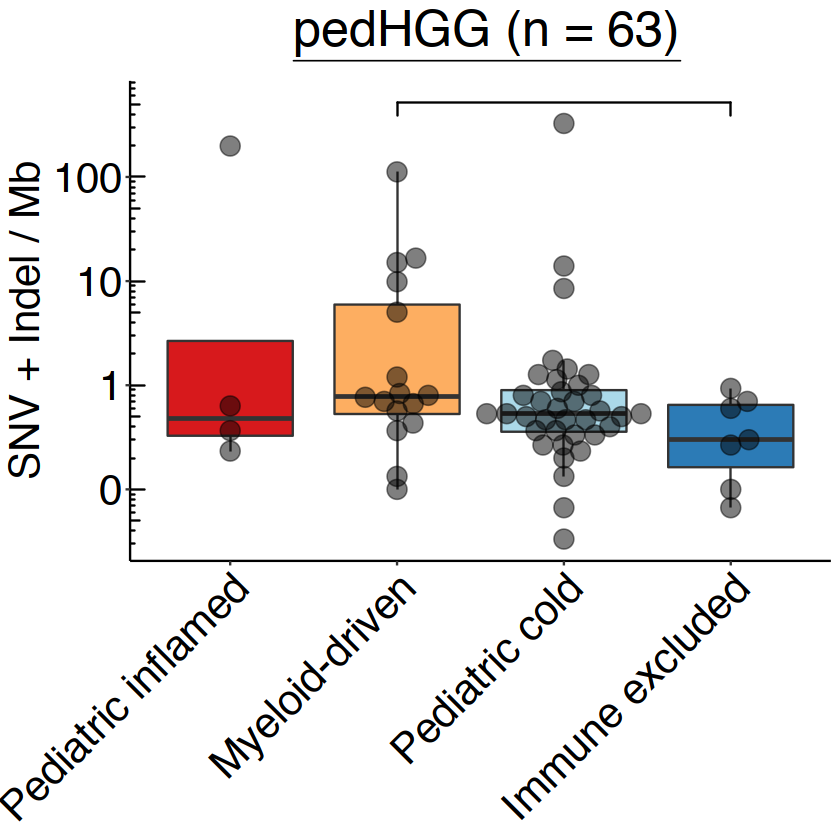

In [43]:
hgg_SNVindel_plot <- ggplot(data = hgg, aes(x = immune_cluster, y = mutpermb, fill = immune_cluster)) + 
geom_boxplot(outlier.shape = NA) + geom_beeswarm(alpha = 0.5, cex = 3, size = 5, color = "black") + 

# log transform y axis remove decimals
scale_y_continuous(trans = "log10", labels = scales::label_number(accuracy = 1)) + 
annotation_logticks(sides = "l") +
scale_fill_manual(values=cluster_col) +
myaxis + myplot + 
#adjust text and title for x axis. adjust title center and above the plot. 
theme(axis.text.x = element_text(angle = 45, hjust = 1),
      axis.title.x = element_blank(), legend.position = "none",
      plot.title = element_text(hjust = 0.5, size = 30)) +

geom_signif(comparisons = list(c("Myeloid-driven", "Immune excluded")), 
            map_signif_level=TRUE, textsize = 10, test = "wilcox.test") +

labs(y = "SNV + Indel / Mb") + ggtitle(expression(~underline("pedHGG (n = 63)")))

hgg_SNVindel_plot

In [44]:
pdf(file = paste0(plotpath,"immune_clusters_HGG_mutpermb.pdf"),
        width = 8, height = 8, useDingbats = FALSE)
hgg_SNVindel_plot
    dev.off()

Warning message in wilcox.test.default(c(-0.24708316973157, -0.176502095445862, :
“cannot compute exact p-value with ties”


pdf 
  2